# Sussexbudgetproduction Report About Movie dataset.

As the data scientist at SussexBudgetProductions, I conducted an in-depth analysis of the provided IMDB data to develop an actionable plan for the upcoming film production. The primary goal is to secure £1.5 million in funding while also ensuring a profitable return on investment. The analysis covers a variety of topics, including budget allocation, genre considerations, and potential risk strategies.
This report aims to provide a comprehensive plan for the upcoming film production, based on data-driven insights and industry best practices. SussexBudgetProductions can increase the likelihood of producing a successful and profitable film by implementing the recommended strategies, securing the necessary funding for continued operations.






## Importing Libraries

In [1]:
# As an refernece for this coding i used links you shared on canvas and mostly cod

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

df = pd.read_csv("movie_metadata.csv")

In [2]:
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

There are 28 columns and total entries around 5043


In [4]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

## Data Cleaning

In [5]:
#removing the duplicates
movie_nd = df.drop_duplicates()

In [6]:
movie_nd.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [7]:
#remove missing values 
movie = movie_nd.dropna()

In [8]:
movie.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [9]:
#descriptive summary of the dataframe
round(movie.describe(),3) #rounding up to 3 decimal places

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3722.000,3722.000,3722.000,3722.000,3722.000,3.722000e+03,3722.000,3722.000,3722.000,3722.000,3.722000e+03,3722.000,3722.000,3722.000,3722.000,3722.000
mean,167.055,110.266,809.993,765.216,7745.403,5.249374e+07,105576.628,11498.042,1.376,335.969,4.624183e+07,2002.963,2010.466,6.465,2.111,9295.011
std,123.359,22.681,3077.028,1869.051,15559.532,6.980792e+07,151579.323,19114.921,2.045,411.111,2.269805e+08,9.893,4531.640,1.053,0.354,21427.784
min,2.000,37.000,0.000,0.000,0.000,1.620000e+02,91.000,0.000,0.000,4.000,2.180000e+02,1927.000,0.000,1.600,1.180,0.000
25%,77.000,96.000,11.000,194.000,745.000,8.130646e+06,19592.250,1910.250,0.000,109.000,1.000000e+07,1999.000,384.000,5.900,1.850,0.000
50%,138.000,106.000,63.000,436.000,1000.000,3.005471e+07,53993.500,4051.500,1.000,209.500,2.500000e+07,2004.000,683.000,6.600,2.350,225.500
75%,224.000,120.000,235.000,690.000,13000.000,6.692169e+07,128558.500,16233.750,2.000,398.000,5.000000e+07,2010.000,975.000,7.200,2.350,11000.000
max,813.000,330.000,23000.000,23000.000,640000.000,7.605058e+08,1689764.000,656730.000,43.000,5060.000,1.221550e+10,2016.000,137000.000,9.300,16.000,349000.000


The descriptive summary shows that after cleaning there is a total entry of 3723.In  data cleaning I remove all the duplicate and missing values for better analysis of data I round up data up to 3 decimal places.

### Language Analysis

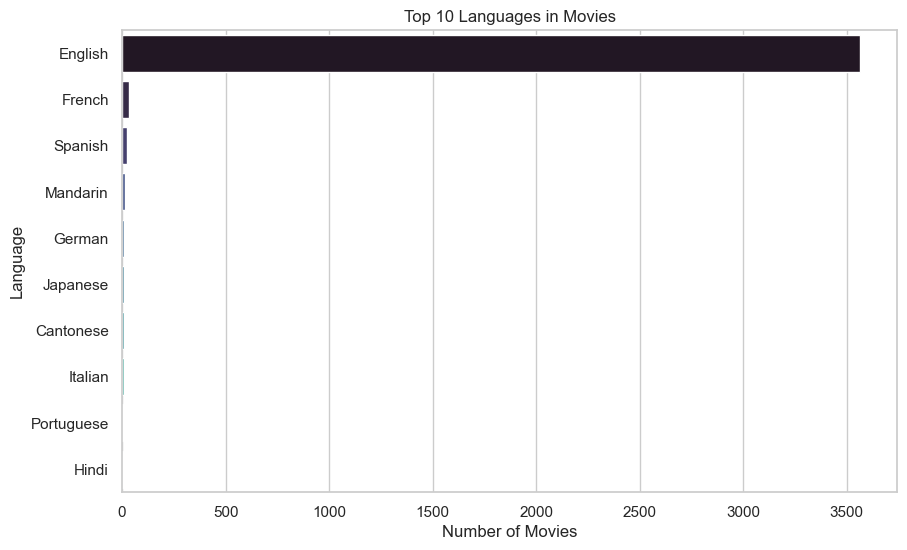

In [10]:
# Setting up the visual style for the plots
sns.set(style="whitegrid")

# Language Analysis with Plots
# Choosing the top 10 most frequent languages for a clearer visualization
top_languages = movie['language'].value_counts().nlargest(10)

# Plotting the count of movies in each of the top 10 languages
plt.figure(figsize=(10, 6))
sns.barplot(x=top_languages.values, y=top_languages.index, palette="mako")
plt.title("Top 10 Languages in Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Language")
plt.show()

The chart distinctly illustrates that English is the predominant language, featuring a substantially higher quantity of movies than any other language. After English, languages such as French, Spanish, and Mandarin also have a significant representation, though with a considerably lesser volume of movies.
If 

### Content Rating Analysis

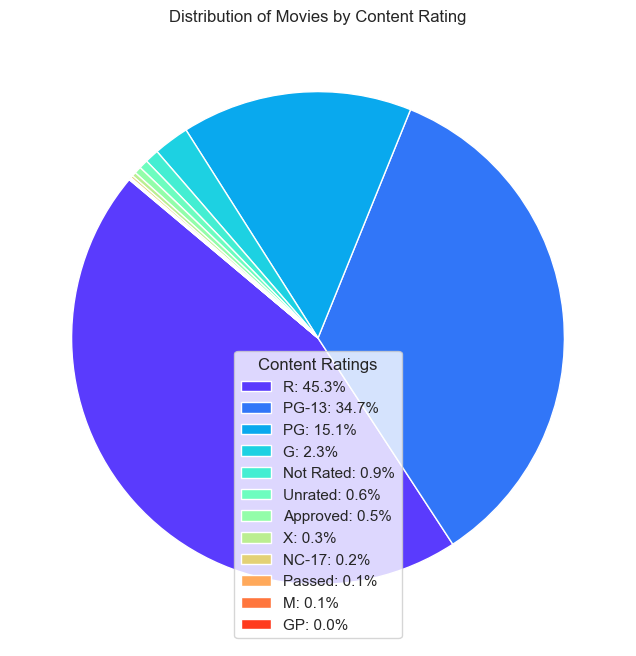

In [11]:
# Calculate the number of movies for each content rating
content_ratings = movie['content_rating'].value_counts()

# Creating a list of labels for the legend that includes both content rating and percentage
legend_labels = [f"{label}: {percentage:.1f}%" for label, percentage in zip(content_ratings.index, (content_ratings / content_ratings.sum() * 100))]

# Creating the pie chart with the 'rainbow' color palette
plt.figure(figsize=(10, 8))
pie, _ = plt.pie(content_ratings, colors=sns.color_palette("rainbow", len(content_ratings)), startangle=140)
plt.title("Distribution of Movies by Content Rating")
plt.legend(pie, legend_labels, title="Content Ratings", loc="best")
plt.show()

The pie chart emphasizes prevalent content ratings such as 'PG-13' and 'R', which tend to occupy larger sections of the chart, while also drawing attention to less frequent ratings, showcasing their scarcity in the movie industry.

### Actor Analysis

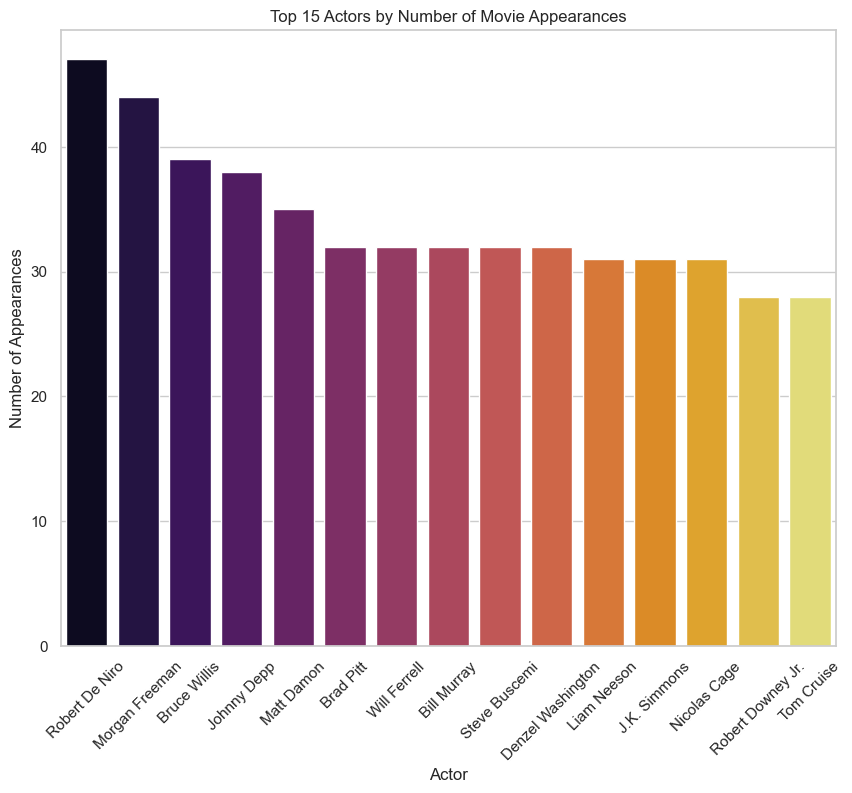

In [12]:
# Counting movies for each actor in the 'actor_1_name', 'actor_2_name', and 'actor_3_name' columns
actor1_counts = movie['actor_1_name'].value_counts()
actor2_counts = movie['actor_2_name'].value_counts()
actor3_counts = movie['actor_3_name'].value_counts()

# Combining counts for all three actor columns
allactor_counts = actor1_counts.add(actor2_counts, fill_value=0).add(actor3_counts, fill_value=0)

# Sorting to find the top 15 actors
top15_actors = allactor_counts.sort_values(ascending=False).head(15)

# Creating a vertical bar plot for the top 15 actors
plt.figure(figsize=(10, 8))
sns.barplot(y=top15_actors.values, x=top15_actors.index, palette="inferno")
plt.title("Top 15 Actors by Number of Movie Appearances")
plt.ylabel("Number of Appearances")
plt.xlabel("Actor")
plt.xticks(rotation=45)
plt.show()

The plot shows top 15 actors in dataset.

- Robert De Niro: With 47 movie appearances, Robert De Niro emerges as the most frequent actor in the dataset, showcasing his prolific career in the film industry.

- Morgan Freeman: Morgan Freeman follows closely with 44 movie appearances, solidifying his reputation as one of the most respected and recognizable actors.

- Bruce Willis: Bruce Willis share the third spot with 39 movie appearances, highlighting his enduring presence in Hollywood.

- Johnny Depp : Johnny Depp is another prominent actor, featuring in 38 movies, which further emphasizes his status as a leading figure in cinema.

- Matt Damon : Matt Damon is noted for his 35 movie appearances, underscoring his versatility and widespread popularity.

- Will Ferrell, Bill Murray, Brad Pitt, Steve Buscemi and Denzel Washington : These five actors, Will Ferrell, Bill Murray, Brad Pitt, Steve Buscemi and Denzel Washington, all have 32 movie appearances, demonstrating their consistent contributions to the film industry.

- Nicolas Cage, Liam Neeson and J.K. Simmons: These three actors have 31 appearances. 

- Robert Downey Jr. and Tom Cruise: These actors have 28 appearances

### Genre Analysis

In [13]:
# Extracting genres
movie['split_genres'] = movie['genres'].str.split('|')

# Initialize a dictionary to hold various statistics for each genre
genre_analysis = {}

# Iterate over each row and update the statistics for each genre
for index, row in movie.iterrows():
    if row['split_genres'] is not None:
        for genre in row['split_genres']:
            if genre not in genre_analysis:
                genre_analysis[genre] = {'count': 0, 'total_rating': 0, 'total_budget': 0, 'total_gross': 0}
            
            # Update the statistics
            genre_analysis[genre]['count'] += 1
            if pd.notna(row['imdb_score']):
                genre_analysis[genre]['total_rating'] += row['imdb_score']
            if pd.notna(row['budget']):
                genre_analysis[genre]['total_budget'] += row['budget']
            if pd.notna(row['gross']):
                genre_analysis[genre]['total_gross'] += row['gross']

# Calculate average values
for genre in genre_analysis:
    genre_data = genre_analysis[genre]
    genre_data['average_rating'] = genre_data['total_rating'] / genre_data['count'] if genre_data['count'] > 0 else 0
    genre_data['average_budget'] = genre_data['total_budget'] / genre_data['count'] if genre_data['count'] > 0 else 0
    genre_data['average_gross'] = genre_data['total_gross'] / genre_data['count'] if genre_data['count'] > 0 else 0

# Convert to DataFrame
genre_analysis_df = pd.DataFrame.from_dict(genre_analysis, orient='index')

genre_analysis_df.head()  # Display the first few rows of the analysis

/var/folders/2c/qr8_qq5s7jd7ls2r315c34100000gn/T/ipykernel_34907/226986256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['split_genres'] = movie['genres'].str.split('|')


,count,total_rating,total_budget,total_gross,average_rating,average_budget,average_gross
Action,951,5981.7,6.808031e+10,7.357374e+10,6.289905,7.158813e+07,7.736460e+07
Adventure,773,4987.7,6.714669e+10,7.764312e+10,6.452393,8.686505e+07,1.004439e+08
Fantasy,504,3168.3,3.532795e+10,4.408405e+10,6.286310,7.009515e+07,8.746835e+07
Sci-Fi,492,3112.3,4.848422e+10,4.093102e+10,6.325813,9.854517e+07,8.319314e+07
Thriller,1105,7046.2,4.827737e+10,5.414381e+10,6.376652,4.368993e+07,4.899892e+07


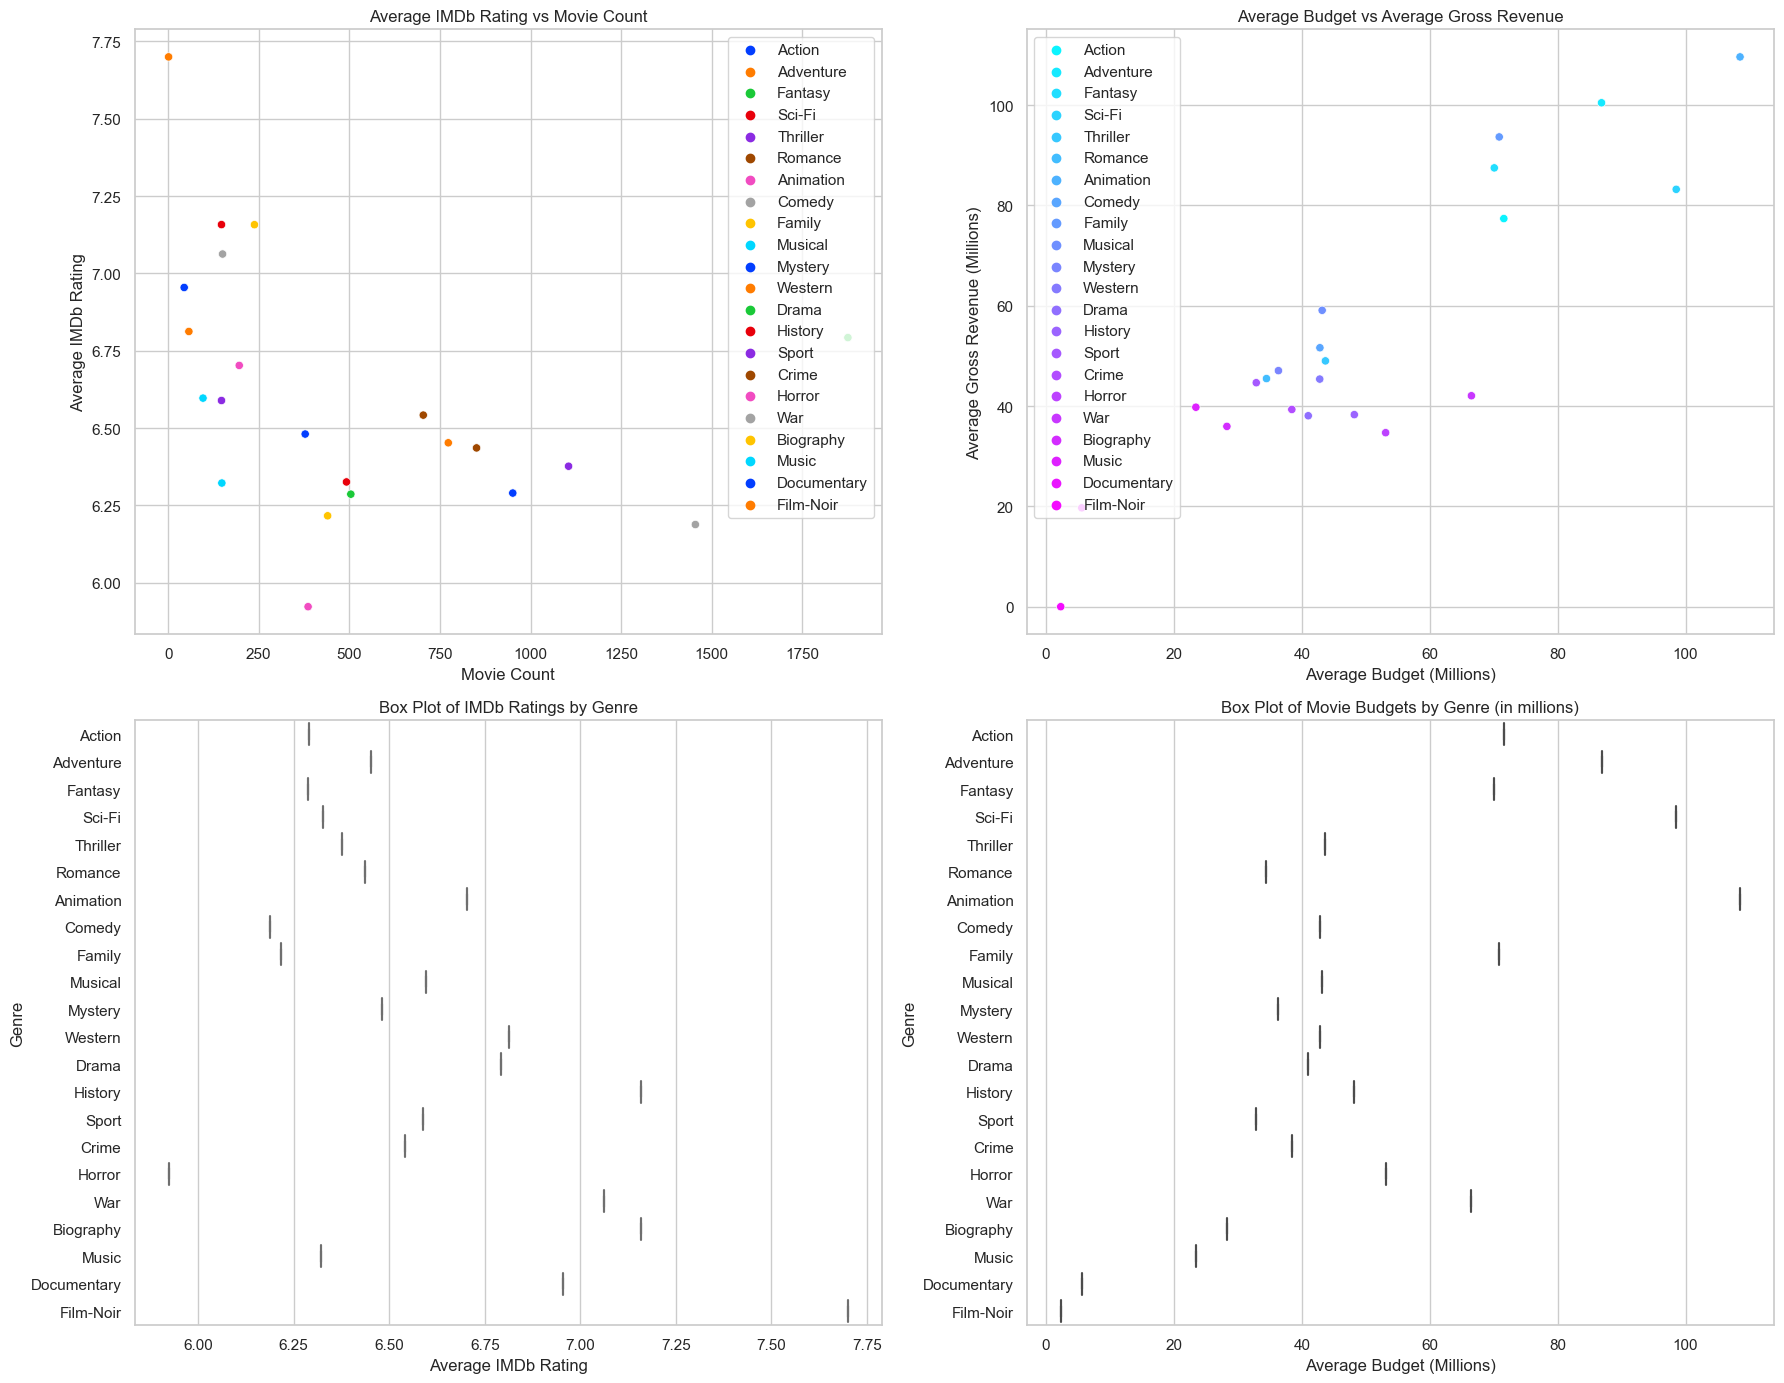

In [14]:
genres = genre_analysis_df.index
counts = genre_analysis_df['count']
average_ratings = genre_analysis_df['average_rating']
average_budgets = genre_analysis_df['average_budget'] / 1e6  # Convert to millions
average_gross = genre_analysis_df['average_gross'] / 1e6  # Convert to millions

# Setting up the plotting environment
sns.set(style="whitegrid")

# Creating the plots
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Scatter Plot for Average Rating vs Count
sns.scatterplot(ax=axes[0, 0], x=counts, y=average_ratings, hue=genres, palette="bright")
axes[0, 0].set_title('Average IMDb Rating vs Movie Count')
axes[0, 0].set_xlabel('Movie Count')
axes[0, 0].set_ylabel('Average IMDb Rating')

# Scatter Plot for Average Budget vs Average Gross
sns.scatterplot(ax=axes[0, 1], x=average_budgets, y=average_gross, hue=genres, palette="cool")
axes[0, 1].set_title('Average Budget vs Average Gross Revenue')
axes[0, 1].set_xlabel('Average Budget (Millions)')
axes[0, 1].set_ylabel('Average Gross Revenue (Millions)')

# Box Plot for Average Ratings by Genre
sns.boxplot(ax=axes[1, 0], x=average_ratings, y=genres, palette="pastel")
axes[1, 0].set_title('Box Plot of IMDb Ratings by Genre')
axes[1, 0].set_xlabel('Average IMDb Rating')
axes[1, 0].set_ylabel('Genre')

# Box Plot for Average Budget by Genre
sns.boxplot(ax=axes[1, 1], x=average_budgets, y=genres, palette="autumn")
axes[1, 1].set_title('Box Plot of Movie Budgets by Genre (in millions)')
axes[1, 1].set_xlabel('Average Budget (Millions)')
axes[1, 1].set_ylabel('Genre')

plt.tight_layout()
plt.show()

The box plot showing average IMDb rating for Genre (Action, Adventure,Fantasy, Sci-Fi and Romance) is good as compare to all others.
Action and Adventure have higher IMDb rating and Movie count as compare to all others.

## Budget vs. Gross Revenue

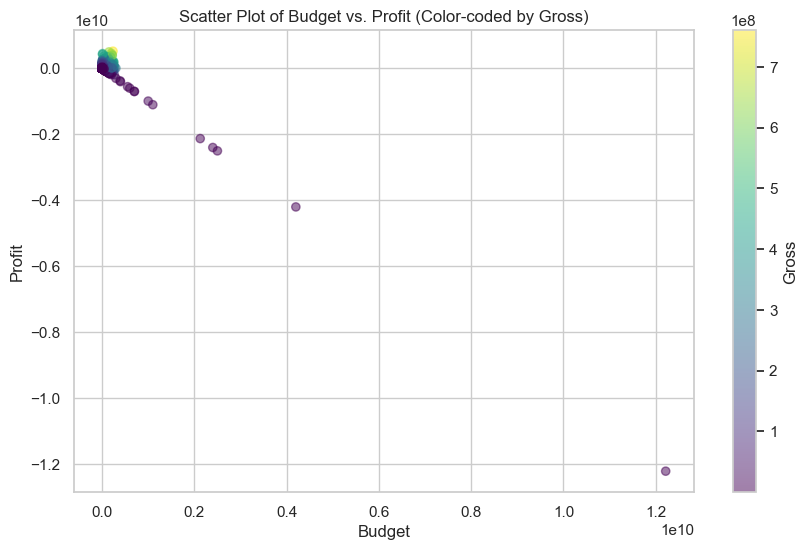

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame 'df'
# If not, you can load your data into df

# Calculate 'Profit' and 'Profit Percentage'
df['profit'] = df['gross'] - df['budget']
#df['profit_percentage'] = (df['profit'] / df['budget']) * 100

# Scatter plot with color-coded points based on 'Gross'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['budget'], df['profit'], c=df['gross'], cmap='viridis', alpha=0.5)

# Add colorbar
plt.colorbar(scatter, label='Gross')

# Set labels and title
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Scatter Plot of Budget vs. Profit (Color-coded by Gross)')

plt.grid(True)
plt.show()



## Time Series Analysis

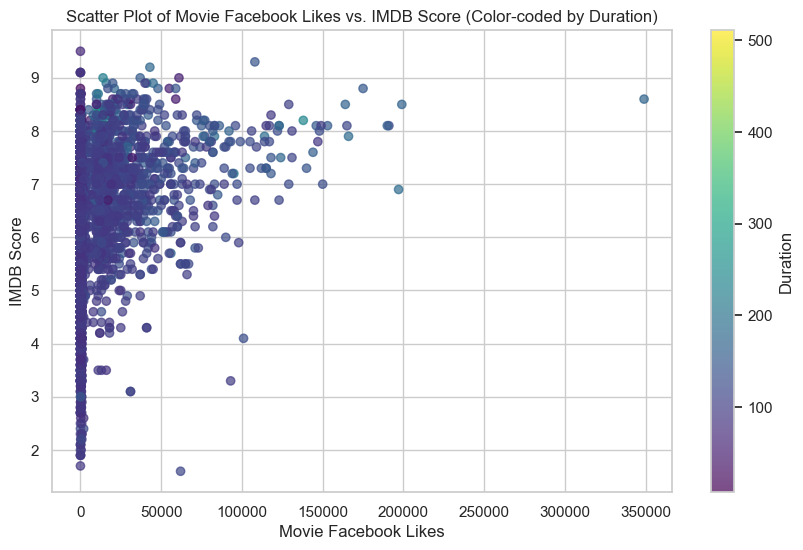

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['movie_facebook_likes'], df['imdb_score'], c=df['duration'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Duration')  # Add a colorbar indicating duration
plt.xlabel('Movie Facebook Likes')
plt.ylabel('IMDB Score')
plt.title('Scatter Plot of Movie Facebook Likes vs. IMDB Score (Color-coded by Duration)')
plt.grid(True)
plt.show()





Here we can see the movies which have IDMB score above than 6.5 have time duration of more than 2 hours as average with an facebook likes between 1000 to 100000.

### HYPOTHESIS TEST ON GROSS COLUMN.

In [17]:
from scipy.stats import ks_2samp
import pandas as pd

alpha = 0.001

# Assuming 'gross_thresh' is the threshold for splitting the DataFrame.
gross_thresh = 84000000 

# Creating two DataFrames based on the 'gross' column value
high_gross_df = df[df["gross"] > gross_thresh]
low_gross_df = df[df["gross"] <= gross_thresh]

sig_cols = [] 

for idx, col in enumerate(df.columns[:-1]):  
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        _, p_value_ks = ks_2samp(high_gross_df[col].dropna(), low_gross_df[col].dropna())
        if p_value_ks < alpha:
            print(f"KS: The low and high gross distributions are significantly different for {col} at the {100*alpha}% significance level, p-value = {p_value_ks}")
            sig_cols.append(col)
        else:
            print(f"KS: The low and high gross distributions are not significantly different for {col} at the {100*alpha}% significance level, p-value = {p_value_ks}")
    else:
        print(f"Column {col} is not numeric and will be skipped.")


Column color is not numeric and will be skipped.
Column director_name is not numeric and will be skipped.
KS: The low and high gross distributions are significantly different for num_critic_for_reviews at the 0.1% significance level, p-value = 1.4371756986703512e-75
KS: The low and high gross distributions are significantly different for duration at the 0.1% significance level, p-value = 1.9462931230270513e-33
KS: The low and high gross distributions are significantly different for director_facebook_likes at the 0.1% significance level, p-value = 2.7246529171946275e-18
KS: The low and high gross distributions are significantly different for actor_3_facebook_likes at the 0.1% significance level, p-value = 3.0909858311569524e-30
Column actor_2_name is not numeric and will be skipped.
KS: The low and high gross distributions are significantly different for actor_1_facebook_likes at the 0.1% significance level, p-value = 5.655539776408234e-41
KS: The low and high gross distributions are si

Here i performed Kolmogorov-Smirnoff  test to  check sample distributions of gross column it is different or not, due to significantly different i will do TWO TAIL Z - TEST ON THE MEAN OF A COLUMN GROSS for reject of null hypothesis.

#### TWO TAIL Z - TEST ON THE MEAN OF A COLUMN GROSS.

In [18]:
import scipy.stats as stats

# Assuming 'df' is your DataFrame

# Define the null hypothesis mean (the expected mean)
null_hypothesis_mean = 0  # Replace with the expected mean value

# Select the 'gross' column from the DataFrame
gross_data = df['gross']

# Calculate the sample mean and standard error of the mean
sample_mean = gross_data.mean()
sample_std = gross_data.std()
sample_size = len(gross_data)

# Perform a two-tail Z-test
z_score = (sample_mean - null_hypothesis_mean) / (sample_std / (sample_size**0.5))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tail test

# Define the significance level (alpha)
alpha = 0.05  # You can adjust this as needed

# Check if the null hypothesis is rejected or not
if p_value < alpha:
    print(f"Z-test result: Reject the null hypothesis. The sample mean is significantly different from the expected mean.")
else:
    print(f"Z-test result: Fail to reject the null hypothesis. The sample mean is not significantly different from the expected mean.")

# Print the Z-score and p-value
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")



Z-test result: Reject the null hypothesis. The sample mean is significantly different from the expected mean.
Z-score: 50.28179920661765
P-value: 0.0


Since the p-value is less than 0.01, we will reject the null hypothesis as there is significant evidence that gross  is associated with budget and genre.

# SUMMARY.




I sampled 3723 by carried Language Analysis,Content Rating Analysis,Actor Analysis,Genre Analysis,Budget vs. Gross Revenue and Time Series Analysis to suggest a actionable and backup plan for company to produce which movie with an Recommendations plan about all factors which will helpful for succesful movie in a business point of view.


HYPOTHESIS STATEMENT:

According to my analysis if company produce a movie and have to select which language is best for upcoming movie is ENGLISH.
English is the top language with higher number of movies and generating a good profit in allover conditions and the backup plan for instead of English is French.
After this I did content analysis which emphasizes prevalent content ratings such as 'PG-13' and 'R' is best for profitable movie and colorful movie is the only choose for present and future time.

The most important factor which  is directly affect profit of movie is Actors,people watched movies sometime just because of actors.
Best actors to cast in future movie is top two with a backup of third one.
Robert De Niro emerges as the most frequent actor in the dataset, showcasing his prolific career in the film industry.
Morgan Freeman follows closely with 44 movie appearances, solidifying his reputation as one of the most respected and recognizable actors.
Bruce Willis share the third spot with 39 movie appearances, highlighting his enduring presence in Hollywood.

It is better to cast both like one frequent actor and one with best reputation.

Genre analysis conclude that Action,Adventure and Fantasy are best genres to produce movie.
If we consider all factors  average ratings, average budget and average gross with an average profit it is best to go for action and as backup plan adventure and fantasy.
According to analysis best movie with an good IDMb rank is one with Action genre so it better to choose this genre having an budget of £1.5 million.

If i compare time series analysis with budget , profit and gross so best time duration for good movie is minimum 1.5 hour and maximum 2 hours.


Mathematical process.

according to my mathematical model of testing i conclude that" movie with an average budget having language of english , genre ( action ) , duration of 2 hours and top actor will do more business as compare to other chooses."
